In [1]:
import os
import sys

ROOT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(ROOT_DIR)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\train\\X_train.txt')
y_train = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\train\\y_train.txt')

X_test = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\test\\X_test.txt')
y_test = np.loadtxt(f'{ROOT_DIR}\\data\\UCI HAR Dataset\\test\\y_test.txt')

y_train = to_categorical(y_train - 1)  
y_test = to_categorical(y_test - 1)

X_train_cnn = X_train.reshape(X_train.shape[0], 561, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 561, 1)

In [3]:
from models.cnn import CNN_model

cnn_model = CNN_model(input_shape=(561, 1))
cnn_model.summary()

C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 559, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 279, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 277, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 138, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 17664)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,261,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,286,854 (8.72 MB)

 Trainable params: 2,286,854 (8.72 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=30, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.7754 - loss: 0.5539 - val_accuracy: 0.9226 - val_loss: 0.1889
Epoch 2/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9319 - loss: 0.1818 - val_accuracy: 0.9474 - val_loss: 0.1386
Epoch 3/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9547 - loss: 0.1218 - val_accuracy: 0.9386 - val_loss: 0.1628
Epoch 4/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9622 - loss: 0.0987 - val_accuracy: 0.9494 - val_loss: 0.1376
Epoch 5/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9691 - loss: 0.0812 - val_accuracy: 0.9433 - val_loss: 0.1732
Epoch 6/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.9708 - loss: 0.0759 - val_accuracy: 0.9396 - val_loss: 0.1936
Epoch 7/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - accuracy: 0.9759 - loss: 0.0638 - val_accuracy: 0.9338 - val_loss: 0.2260
Epoch 8/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.9746 - loss: 0.0631 - 

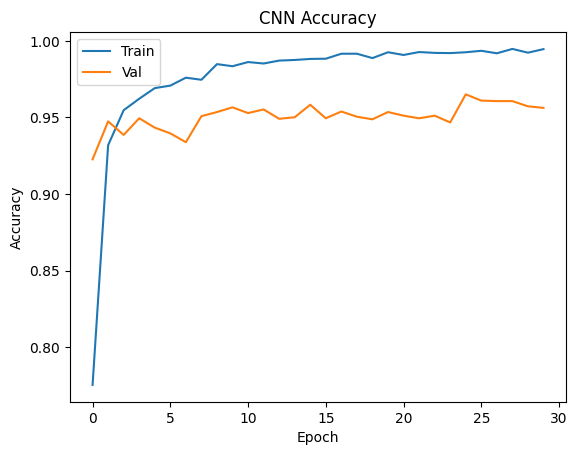

In [5]:
import matplotlib.pyplot as plt

plt.plot(cnn_history.history["accuracy"])
plt.plot(cnn_history.history["val_accuracy"])
plt.title("CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Val"])
plt.show()

In [6]:
test_loss, test_acc = cnn_model.evaluate(X_test_cnn, y_test)
print("Test Accuracy:", test_acc)

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9562 - loss: 0.2355
Test Accuracy: 0.956226646900177
